<a href="https://colab.research.google.com/github/AlanEST/AM/blob/main/Int_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
print('Hola mundo!')

Hola mundo!


In [7]:
import pandas as pd
sat_df = pd.read_csv('http://bit.ly/PMR-ch2')
sat_df.Segment = sat_df.Segment.astype(pd.api.types.CategoricalDtype())
sat_df.head()

,iProdSAT,iSalesSAT,Segment,iProdREC,iSalesREC
0,6,2,1,4,3
1,4,5,3,4,4
2,5,3,4,5,4
3,3,3,2,4,4
4,3,3,3,2,2


In [8]:
sat_df.describe()

,iProdSAT,iSalesSAT,iProdREC,iSalesREC
count,500.000000,500.000000,500.000000,500.000000
mean,4.130000,3.802000,4.044000,3.444000
std,1.091551,1.159951,1.299786,1.205724
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000
max,7.000000,7.000000,7.000000,7.000000


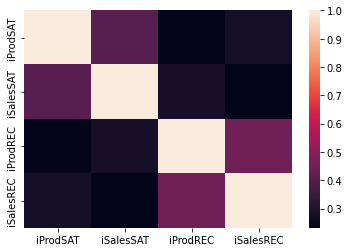

In [9]:
import seaborn as sns
sns.heatmap(sat_df.corr())

In [10]:
sat_df.groupby('Segment').iProdSAT.mean()

Segment
1    3.462963
2    3.725191
3    4.103896
4    4.708075
Name: iProdSAT, dtype: float64

In [12]:
import statsmodels.formula.api as smf
from statsmodels.stats import anova as sms_anova
segment_psat_lm = smf.ols('iProdSAT ~ -1 + Segment', data = sat_df).fit()
sms_anova.anova_lm(segment_psat_lm)

,df,sum_sq,mean_sq,F,PR(>F)
Segment,4.0,8627.850038,2156.962510,2160.66543,3.569726e-312
Residual,496.0,495.149962,0.998286,NaN,NaN


<ErrorbarContainer object of 3 artists>

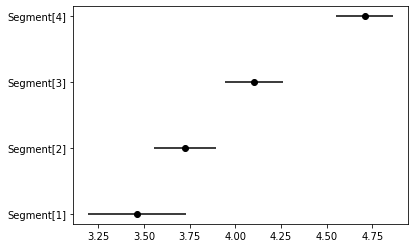

In [13]:
import matplotlib.pyplot as plt
plt.errorbar(y=segment_psat_lm.params.index, x=segment_psat_lm.params.values,xerr=segment_psat_lm.conf_int()[1].T - segment_psat_lm.params, fmt='ko')